<a href="https://colab.research.google.com/github/santialferez/tallerCV/blob/master/TallerCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import cv2
from urllib import request
from matplotlib import pyplot as plt


In [44]:
# Funcion para leer una imagen desde un link (url) con opencv
def url_to_image(url):
  #Baja la imagen, la convierte en un array de numpy y la lee con opencv
  resp = request.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  return image

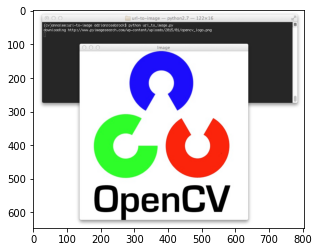

In [45]:
im = url_to_image("casa.jpg")
plt.imshow(im);

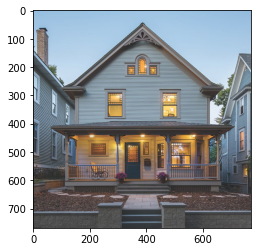

In [50]:
im = cv2.imread("casa.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) # Opencv tiene por defecto los colores BGR (blue,green,red)
plt.imshow(im);

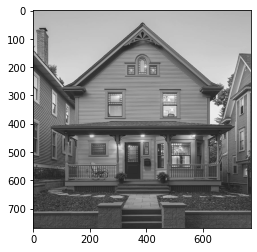

In [52]:
im_gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
plt.imshow(im_gray, cmap='gray');

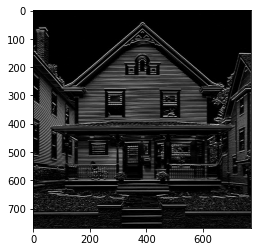

In [18]:
#prewitt lineas horizontales
kernelx = np.array( [[ 1, 1, 1],
                     [ 0, 0, 0],
                     [-1,-1,-1]] )
img_prewittx = cv2.filter2D(im_gray, -1, kernelx)
plt.imshow(img_prewittx, cmap='gray');

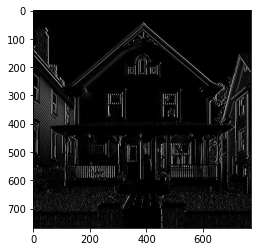

In [20]:
#prewitt lineas verticales
kernely = np.array( [[-1, 0, 1],
                     [-1, 0, 1],
                     [-1, 0, 1]] )
img_prewitty = cv2.filter2D(im_gray, -1, kernely)
plt.imshow(img_prewitty, cmap='gray');

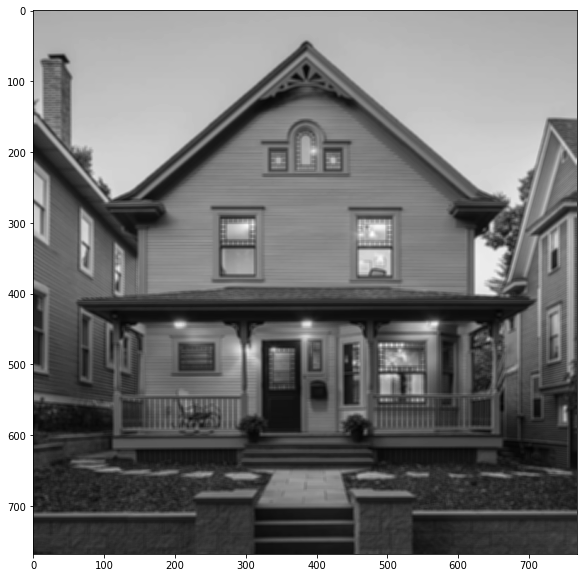

In [25]:
#prewitt lineas verticales
kernel_mean = (1/25)*np.array( [[1, 1, 1, 1, 1],
                                [1, 1, 1, 1, 1],
                                [1, 1, 1, 1, 1],
                                [1, 1, 1, 1, 1],
                                [1, 1, 1, 1, 1]] )
casa_gray_mean = cv2.filter2D(im_gray, -1, kernel_mean)
plt.figure(figsize=(10,10)) # Con esto se aumenta el tamano de visualizacion de la imagen
plt.imshow(casa_gray_mean, cmap='gray');

### Ejercicios
- Realice el filtrado bidimensional (mediante convolución) para producir una nitidez aumentada (sharpening) sobre la imagen de la casa
- Realice el filtrado (mediante convolución) para producir un suavizado de tipo Gaussiano

## Algo más avanzado (opcional). Uso del algoritmo de Viola-Jones

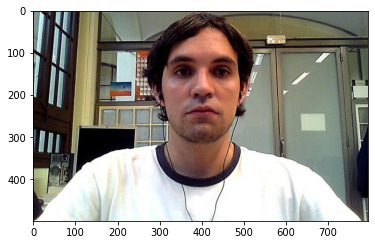

In [69]:
img = cv2.imread("santiYoung.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);

In [64]:
#Cargando los clasificadores (en formato XML)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Convierte la imagen a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [65]:
# Realiza la deteccion de rostros
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

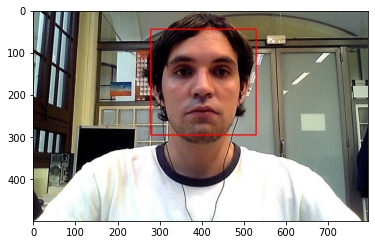

In [68]:
# Dibuja rectangulos en las caras y ojos
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
plt.imshow(img);

**Ejercicio**

Realice la detección de rostros en otra imagen que tenga varias caras